# Lab 1 - API de Acesso a Dados

# Tarefa 1

Das fontes de dados disponíveis, tente encontrar fontes com formatos diferentes e importá-las via Python. Busque pelo menos dois formatos.

## I - Climate Data API

> Fornece diversos dados acerca de mudanças de clima ao redor do globo. Neste caso, estamos aquisitando a temperatura média e a precipitação média dos EUA e Brasil ao longo dos anos, de 1990 a 2012. Nesta primeira parte, os dados foram aquisitados em .csv.

In [8]:
#Temperatura média dos países ao longo dos anos
import io
import requests
import json
import pandas as pd

#Para procurar por outros países, mude /bra.csv ou /usa.csv
data_bra = requests.get("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/bra.csv").content
data_usa = requests.get("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/usa.csv").content

csv_bra = pd.read_csv(io.StringIO(data_bra.decode("utf-8")))
csv_usa = pd.read_csv(io.StringIO(data_usa.decode("utf-8")))

country1 = []
country2 = []
for i in range (0,112):
    country1.append("BRA")
    country2.append("USA")

csv_bra["country"] = country1
csv_usa["country"] = country2
frames = [csv_bra, csv_usa]
result = pd.concat(frames, ignore_index = True)
filtered = result[result["year"] >= 1990] 
filtered = filtered.rename(columns={"data":"avg temp"})
print(filtered)

     year   avg temp country
89   1990  25.069971     BRA
90   1991  25.041132     BRA
91   1992  24.834690     BRA
92   1993  24.955845     BRA
93   1994  25.072952     BRA
94   1995  25.300232     BRA
95   1996  25.046738     BRA
96   1997  25.368227     BRA
97   1998  25.686230     BRA
98   1999  25.147045     BRA
99   2000  25.142067     BRA
100  2001  25.421627     BRA
101  2002  25.657181     BRA
102  2003  25.480742     BRA
103  2004  25.389252     BRA
104  2005  25.700729     BRA
105  2006  25.494154     BRA
106  2007  25.547108     BRA
107  2008  25.218435     BRA
108  2009  25.496075     BRA
109  2010  25.681717     BRA
110  2011  25.390158     BRA
111  2012  25.582172     BRA
201  1990   7.391685     USA
202  1991   7.500322     USA
203  1992   6.967962     USA
204  1993   7.099425     USA
205  1994   7.285927     USA
206  1995   7.419545     USA
207  1996   6.699590     USA
208  1997   7.052270     USA
209  1998   8.045993     USA
210  1999   7.159595     USA
211  2000   7.

In [7]:
#Precipitação média dos países ao longo dos anos
#Para procurar por outros países, mude /bra.csv ou /usa.csv
data_bra_2 = requests.get("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/pr/year/bra.csv").content
data_usa_2 = requests.get("http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/pr/year/usa.csv").content

csv_bra_2 = pd.read_csv(io.StringIO(data_bra_2.decode("utf-8")))
csv_usa_2 = pd.read_csv(io.StringIO(data_usa_2.decode("utf-8")))

country1 = []
country2 = []
for i in range (0,112):
    country1.append("BRA")
    country2.append("USA")

csv_bra_2["country"] = country1
csv_usa_2["country"] = country2
frames = [csv_bra_2, csv_usa_2]
result_2 = pd.concat(frames, ignore_index = True)
filtered_2 = result_2[result_2["year"] >= 1990] 
filtered_2 = filtered_2.rename(columns={"data":"avg prec"})
print(filtered_2)

     year    avg prec country
89   1990  136.721954     BRA
90   1991  141.178177     BRA
91   1992  141.758301     BRA
92   1993  140.833908     BRA
93   1994  149.333664     BRA
94   1995  148.477402     BRA
95   1996  154.924683     BRA
96   1997  149.370132     BRA
97   1998  145.166656     BRA
98   1999  149.793259     BRA
99   2000  164.984314     BRA
100  2001  144.161758     BRA
101  2002  150.931564     BRA
102  2003  142.445343     BRA
103  2004  151.918533     BRA
104  2005  151.579071     BRA
105  2006  155.500580     BRA
106  2007  145.254257     BRA
107  2008  158.684723     BRA
108  2009  159.890503     BRA
109  2010  150.251816     BRA
110  2011  154.514954     BRA
111  2012  139.948105     BRA
201  1990   59.143402     USA
202  1991   59.322590     USA
203  1992   57.899616     USA
204  1993   59.047901     USA
205  1994   56.417408     USA
206  1995   56.049694     USA
207  1996   57.798462     USA
208  1997   56.686321     USA
209  1998   59.576092     USA
210  1999 

## II - World Bank API

> Dados acerca da emissão de gases estufa e tamanho da área florestal de cada país a cada ano onde, neste caso, estamos coletando dos Estados Unidos e do Brasil. A intenção principal é correlacionar ações antrópicas com as alterações climáticas de cada país (ex: temperatura média anual). Aqui, os dados são aquisitados em .xml.

In [17]:
import xml.etree.ElementTree as et
url_pg1 = "http://api.worldbank.org/v2/country/usa;bra/indicator/EN.ATM.GHGT.KT.CE;AG.LND.FRST.K2?date=1990:2012&source=2&page=1"
url_pg2 = "http://api.worldbank.org/v2/country/usa;bra/indicator/EN.ATM.GHGT.KT.CE;AG.LND.FRST.K2?date=1990:2012&source=2&page=2"
data = requests.get(url_pg1).content
data2 = requests.get(url_pg2).content

df = pd.DataFrame(columns=["country", "year", "GGE"])
forest_area = []
count1 = 0

#Pagina 1
root = et.parse(io.StringIO(data.decode("utf-8"))).getroot()

for i in root:
    indicator = i.find("{http://www.worldbank.org}indicator").text
    country = i.find("{http://www.worldbank.org}countryiso3code").text
    year = i.find("{http://www.worldbank.org}date").text
    value = i.find("{http://www.worldbank.org}value").text

    if indicator == "Total greenhouse gas emissions (kt of CO2 equivalent)":
        df.loc[count1] = [country] + [year] + [value]
        count1 = count1 + 1
    elif indicator == "Forest area (sq. km)":
        forest_area.append(value)
    
#Pagina 2
root = et.parse(io.StringIO(data2.decode("utf-8"))).getroot()

for i in root: #nesse não contabilizei os outros fatores ja que na pagina so existem dados de forest area
    indicator = i.find("{http://www.worldbank.org}indicator").text
    value = i.find("{http://www.worldbank.org}value").text

    if indicator == "Forest area (sq. km)":
        forest_area.append(value)

df["forest area"] = forest_area
        
print(df)


   country  year      GGE forest area
0      BRA  2012  1042040   5085023.4
1      BRA  2011  1004840   5100415.2
2      BRA  2010   986440     5115807
3      BRA  2009   905490   5155314.9
4      BRA  2008   924380   5194822.8
5      BRA  2007   911240   5234330.7
6      BRA  2006   886910   5273838.6
7      BRA  2005   888930   5313346.5
8      BRA  2004   883460   5352854.4
9      BRA  2003   837390   5392362.3
10     BRA  2002   823220   5431870.2
11     BRA  2001   796350   5471378.1
12     BRA  2000   765600     5510886
13     BRA  1999   752070   5548695.4
14     BRA  1998   736040   5586504.8
15     BRA  1997   713090   5624314.2
16     BRA  1996   685170   5662123.6
17     BRA  1995   677740     5699933
18     BRA  1994   657690   5737742.4
19     BRA  1993   641360   5775551.8
20     BRA  1992   631150   5813361.2
21     BRA  1991   621220   5851170.6
22     BRA  1990   593950     5888980
23     USA  2012  5968740     3092700
24     USA  2011  6214430     3089950
25     USA  

# Tarefa 2

## Engenharia reversa

Monte um diagramas que representem modelos dos dados que você terá acesso e como pretende associá-los. Coloque abaixo uma imagem do diagrama.

> A intenção é associar os dados obtidos de forma a correlacionar ações antrópicas com possíveis alterações climáticas. Neste caso, estou buscando relacionar o aumento da emissão de gases de efeito estufa (GGE) e a diminuição da cobertura florestal de cada país (USA E BRA) com suas mudanças climáticas de acordo com cada ano.

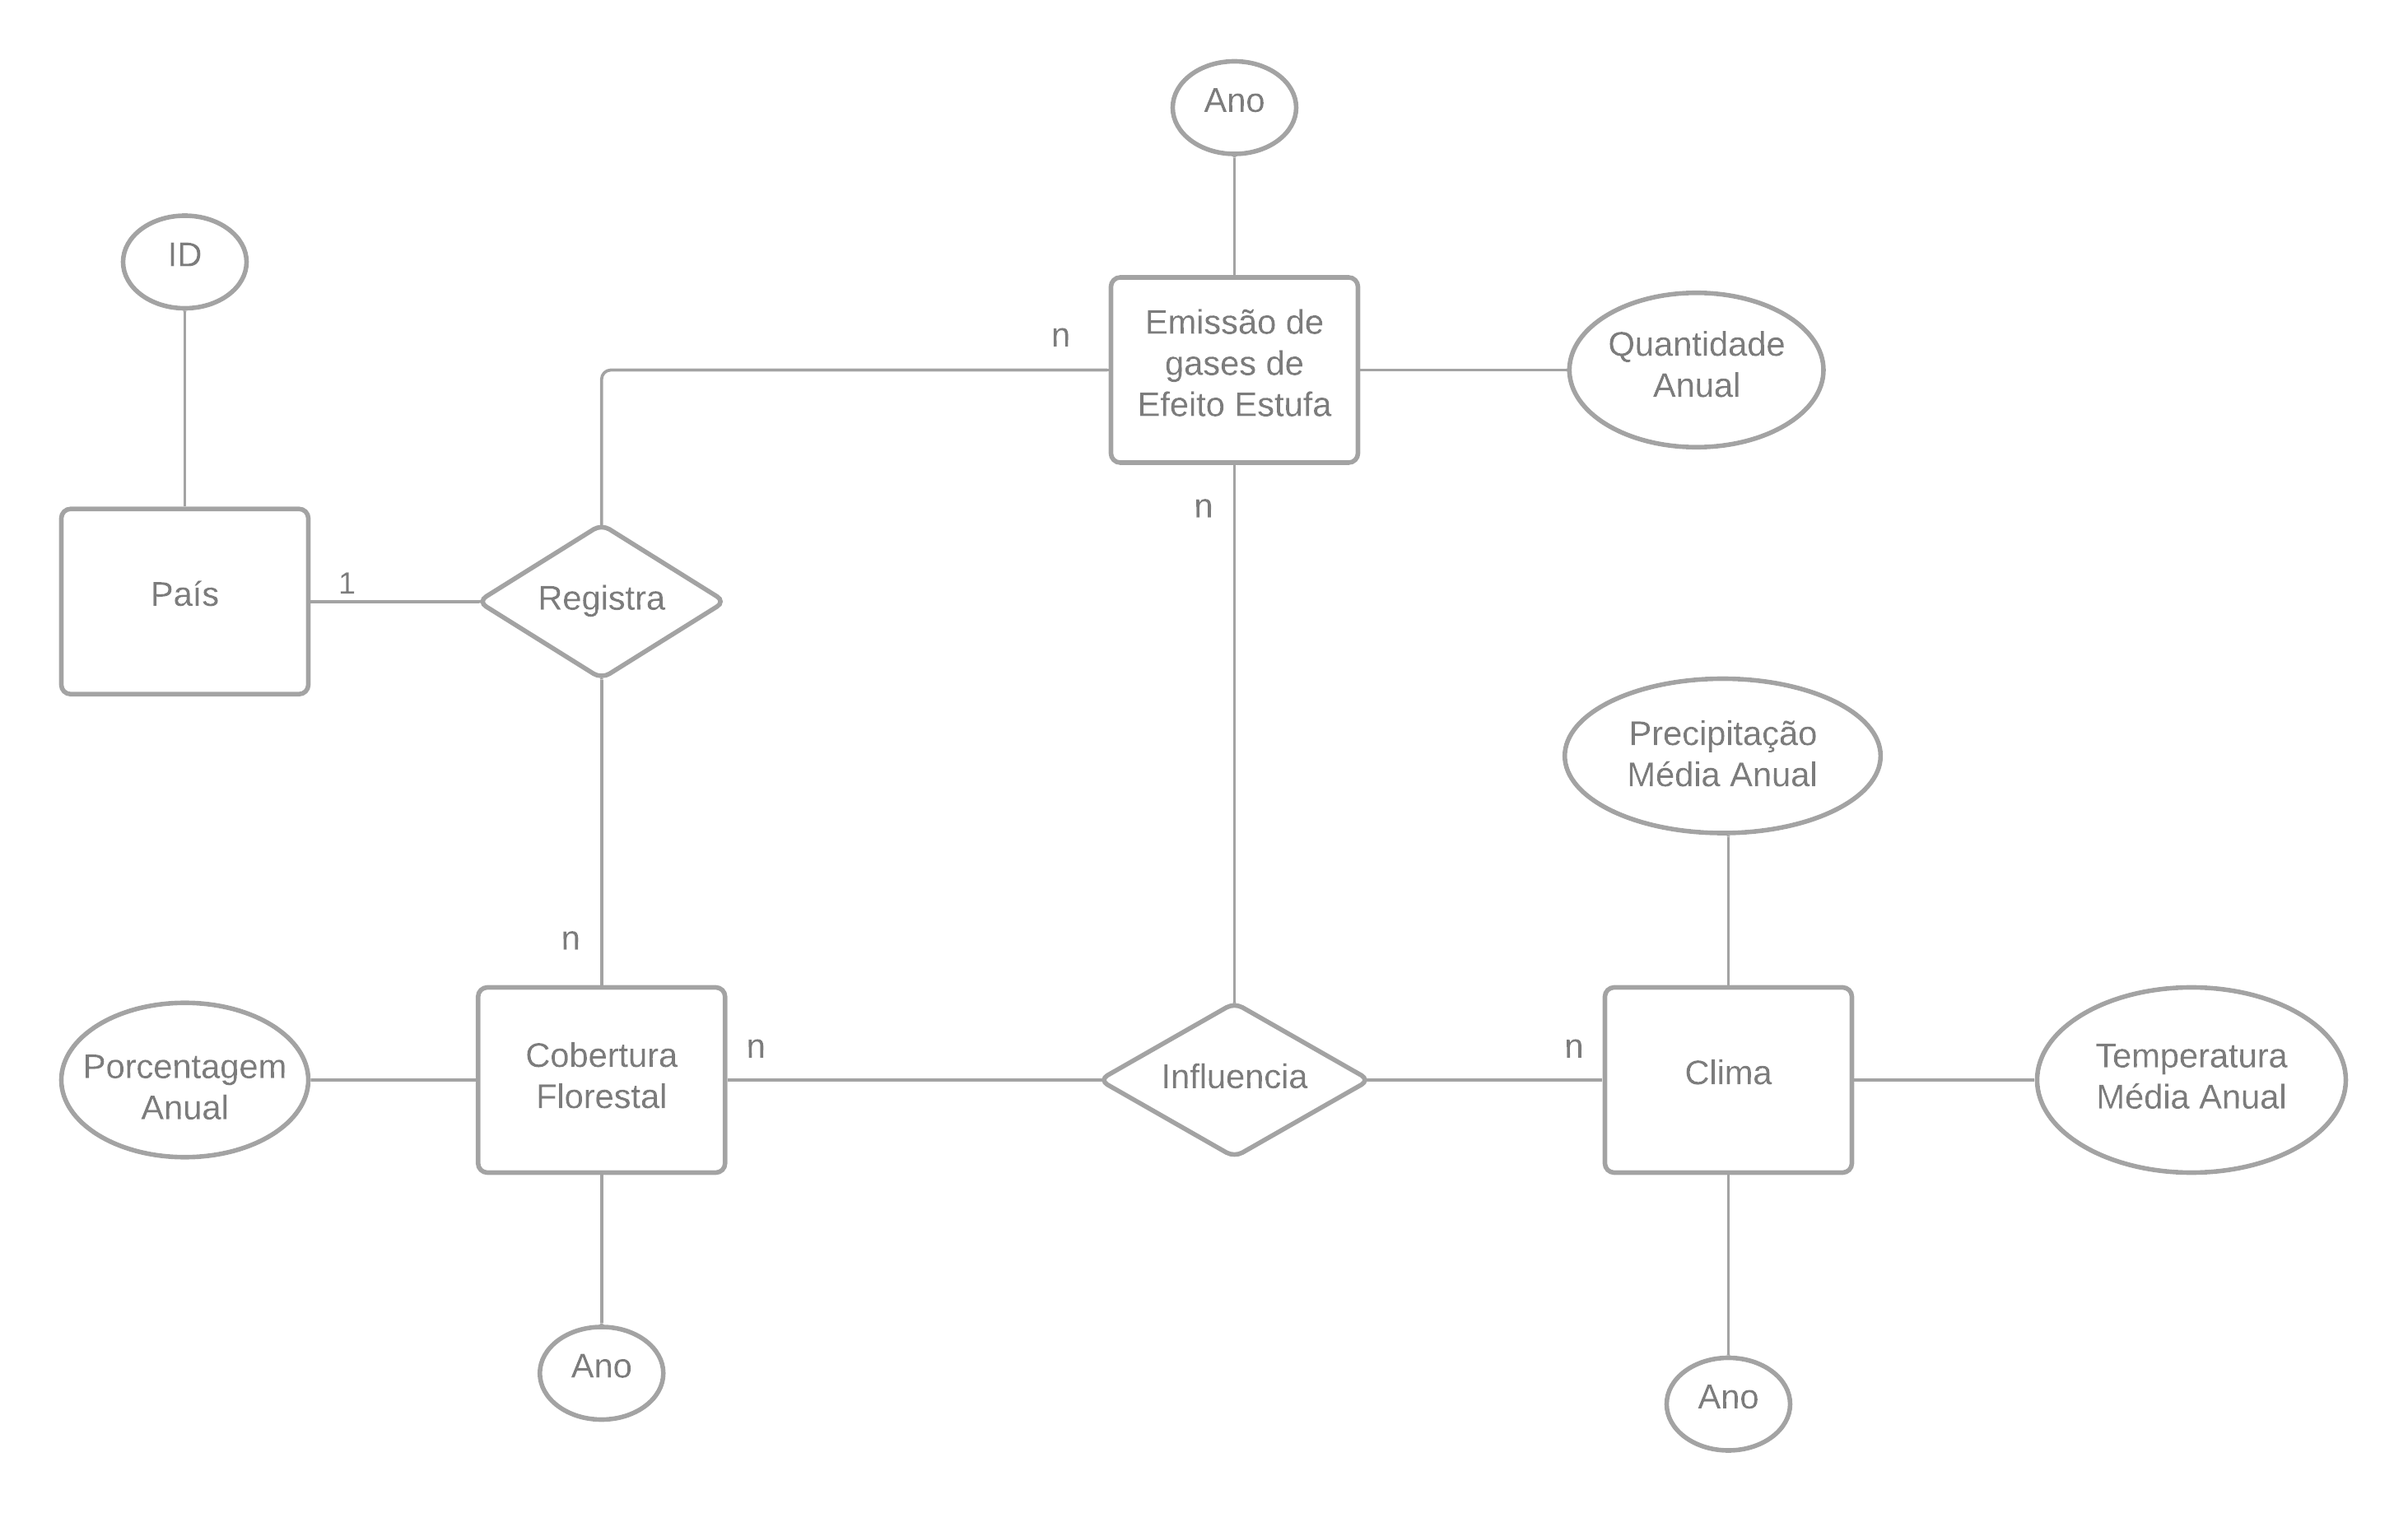

In [18]:
from IPython import display
display.Image("./ER_lab01.png")